# Análise: Como os maiores orçamentos dos filmes se distribuem por gênero ao longo dos anos? É possível dizer que um maior investimento em filmes de determinado gênero reflete o estado da população naquele período?

In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import statsmodels.formula.api as smf
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def despine(ax=None):
    if ax is None:
        ax = plt.gca()
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

## EDA & Testes - Analisemos a distribuição dos maiores orçamentos por gênero ao longo dos anos. Há uma concentração significativa?
### Nessa etapa, nossa análise será mais visual e subjetiva. Tratemos os dados para visualizar os resultados.

C:\Users\rafam\AppData\Local\Temp\ipykernel_10516\1130174759.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv('movies_metadata.csv')
C:\Users\rafam\AppData\Local\Temp\ipykernel_10516\1130174759.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['release_date'] = pd.to_datetime(movies['release_date'], format='%Y-%m-%d', errors='coerce')
C:\Users\rafam\AppData\Local\Temp\ipykernel_10516\1130174759.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

1920
Número de filmes na década de 1920: 16
1930
Número de filmes na década de 1930: 39
1940
Número de filmes na década de 1940: 51
1950
Número de filmes na década de 1950: 86
1960
Número de filmes na década de 1960: 149
1970
Número de filmes na década de 1970: 216
1980
Número de filmes na década de 1980: 580
1990
Número de filmes na década de 1990: 1057
2000
Número de filmes na década de 2000: 1990
2010
Número de filmes na década de 2010: 1623


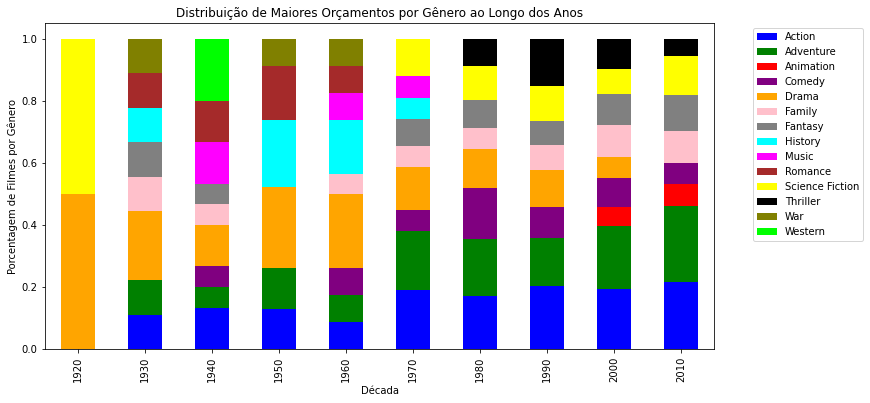

In [3]:

movies = pd.read_csv('movies_metadata.csv')
movies = movies[['title','budget','genres','id', 'imdb_id', 'original_language','popularity', 'production_companies', 'production_countries', 'release_date', 'revenue', 'vote_average','vote_count']]
movies['release_date'] = pd.to_datetime(movies['release_date'], format='%Y-%m-%d', errors='coerce')
movies['release_year'] = movies['release_date'].dt.year

#Ordene os filmes por cache (budget) e mostre os 10 primeiros
movies = movies.loc[movies['budget'] != 0]
movies = movies.loc[movies['revenue'] != 0]
movies['budget'] = pd.to_numeric(movies['budget'],'coerce').fillna(0).astype(float)
movies['revenue'] = pd.to_numeric(movies['revenue'],'coerce').fillna(0).astype(float)
movies.rename(columns={'id': 'movieId'}, inplace=True)
movies.set_index('movieId', inplace=True)
movies.dropna(inplace=True)
movies = movies.sort_values(by=['revenue'], ascending=False)
movies = movies.query('budget >= 1000.0 & revenue >= 1000.0')
movies['decade'] = (movies['release_year'] // 10) * 10

def extract_genres(genre_list):
    genres = []
    try:
        genre_list = json.loads(genre_list.replace("'", "\""))  # Corrige aspas simples para duplas para serem válidas em JSON
        for genre in genre_list:
            genres.append(genre['name'])
    except:
        pass
    return genres

# Aplica a função aos dados da coluna 'genres' e cria uma nova coluna 'genre_names'
movies['genre_names'] = movies['genres'].apply(extract_genres)

loopResults = []
top_10_percent = []
for i in range(1920, 2011, 10):
    print(i)
    result = movies.query(f'release_year >= {i} & release_year <= {i + 10} & budget > 0').sort_values(by=['budget'], ascending=False)
    print("Número de filmes na década de " + str(i) + ": " + str(len(result)))
    top_10_percent_atual =  result.head(int(0.1 * len(result)))
    genre_counts = top_10_percent_atual['genre_names'].explode().value_counts()
    loopResults.append(genre_counts)
    top_10_percent.append(top_10_percent_atual)

# Crie um dicionário para armazenar os dados
data = {}
indice = 1920
for decade, genre_count in enumerate(loopResults, start=1920):
    data[indice] = genre_count[genre_count >= sum(genre_count) * 0.05] # Pegando apenas os gêneros que representam mais de 5% dos filmes
    indice += 10


# Converta o dicionário em um DataFrame
df = pd.DataFrame(data)

# Transponha o DataFrame para que as décadas sejam colunas
df = df.transpose()
df.fillna(0, inplace=True)


colors = ['blue', 'green', 'red', 'purple', 'orange', 'pink', 'gray', 'cyan', 'magenta', 'brown', 'yellow', 'black', 'olive', 'lime', 'teal', 'aqua', 'maroon', 'navy', 'gold', 'crimson', 'coral', 'tan', 'salmon', 'indigo', 'violet', 'turquoise', 'moccasin', 'lavender', 'khaki', 'ivory', 'fuchsia', 'darkgreen', 'darkblue', 'darkred', 'darkgray', 'darkcyan', 'darkmagenta', 'darkorange', 'darkviolet', 'darkgoldenrod', 'darkkhaki', 'darkolivegreen', 'darkorchid', 'darksalmon', 'darkseagreen', 'darkslateblue', 'darkslategray', 'darkturquoise', 'deeppink', 'deepskyblue', 'dimgray', 'dodgerblue', 'firebrick', 'forestgreen', 'gainsboro', 'ghostwhite', 'goldenrod', 'greenyellow', 'hotpink', 'indianred', 'indigo', 'khaki', 'lavenderblush', 'lawngreen', 'lemonchiffon', 'lightblue', 'lightcoral', 'lightcyan', 'lightgoldenrodyellow', 'lightgray', 'lightgreen', 'lightpink', 'lightsalmon', 'lightseagreen', 'lightskyblue', 'lightslategray', 'lightsteelblue', 'lightyellow', 'limegreen', 'linen', 'magenta', 'mediumaquamarine', 'mediumblue', 'mediumorchid', 'mediumpurple', 'mediumseagreen', 'mediumslateblue', 'mediumspringgreen', 'mediumturquoise', 'mediumvioletred', 'midnightblue', 'mintcream', 'mistyrose', 'moccasin', 'navajowhite', 'oldlace', 'olivedrab', 'orangered', 'orchid', 'palegoldenrod', 'palegreen', 'paleturquoise', 'palevioletred', 'papayawhip', 'peachpuff', 'peru', 'plum', 'powderblue', 'rosybrown', 'royalblue', 'saddlebrown', 'sandybrown', 'seagreen', 'seashell', 'sienna', 'skyblue', 'slateblue', 'slategray']

df_percentage = df.div(df.sum(axis=1), axis=0)

# Plote um gráfico de barras empilhadas com as porcentagens
ax = df_percentage.plot(kind='bar', stacked=True, color=colors, figsize=(12, 6))

# Defina rótulos e título
plt.xlabel('Década')
plt.ylabel('Porcentagem de Filmes por Gênero')
plt.title('Distribuição de Maiores Orçamentos por Gênero ao Longo dos Anos')

# Exiba a legenda fora do gráfico
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Exiba o gráfico
plt.show()

### Como é possível observar no gráfico, a distribuição dos maiores orçamentos mudou bastante ao longo dos anos. Gêneros que tinham uma parcela considerável nos 10% maiores orçamentos de décadas passadas pararam de aparecer nesse grupo com o passar do tempo.

In [4]:
movies.reset_index(inplace=True)

Vamos criar colunas para posterior análise do lucro.
Além disso, vamos codificar os dados categóricos usando o one-hot encoding. Também selecionaremos apenas os filmes com os 10% maiores orçamentos de cada década, já que a análise para responder nossas perguntas permeia esses dados.

In [5]:
# Criação de colunas de lucro e lucro relativo
movies['profit'] = movies['revenue'] - movies['budget']
movies['relative_profit'] = movies['profit'] / movies['budget']

# Criação de tabelas auxiliares e mais específicas, que contém o one-hot encoding de gêneros e apenas os 10% maiores orçamentos de cada década
movies_encoded = pd.get_dummies(movies['genre_names'].explode(), prefix='genre').groupby(level=0).sum()
movies_encoded = pd.concat([movies, movies_encoded], axis=1)
movies_encoded = movies_encoded.drop(columns=['imdb_id', 'original_language', 'production_companies', 'production_countries', 'release_date', 'popularity', 'vote_average', 'vote_count'])

movies_select = movies_encoded.groupby('decade').apply(lambda x: x.nlargest(int(len(x) * 0.1), 'budget')).reset_index(drop=True)

### Para visualizar melhor a distribuição dos maiores orçamentos ao longo dos anos, plotamos gráficos para todos os gêneros.

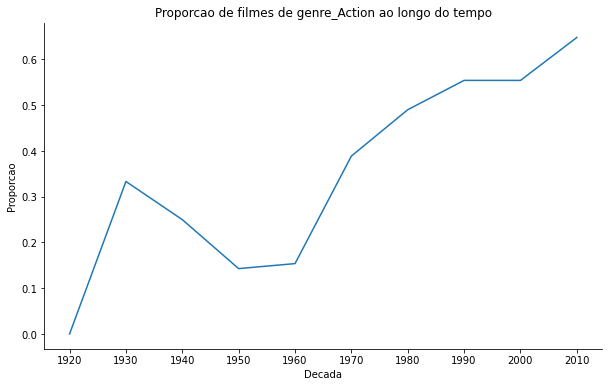

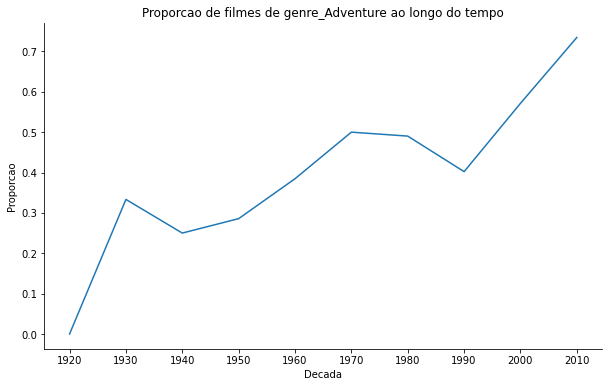

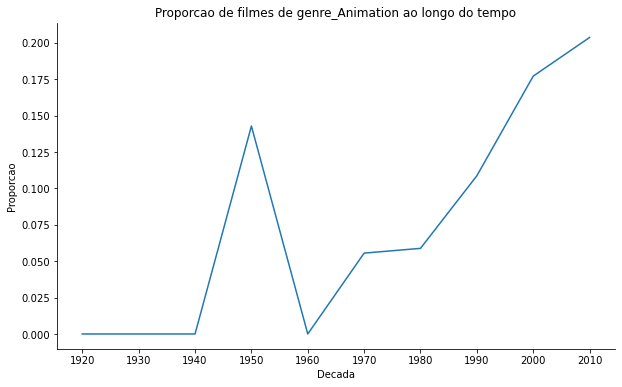

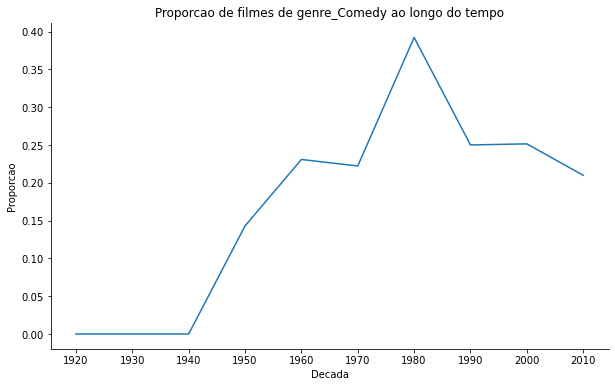

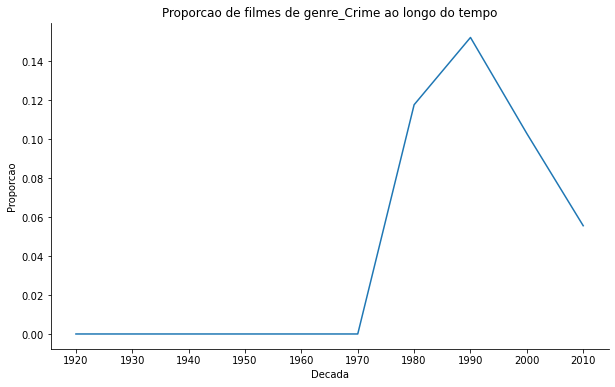

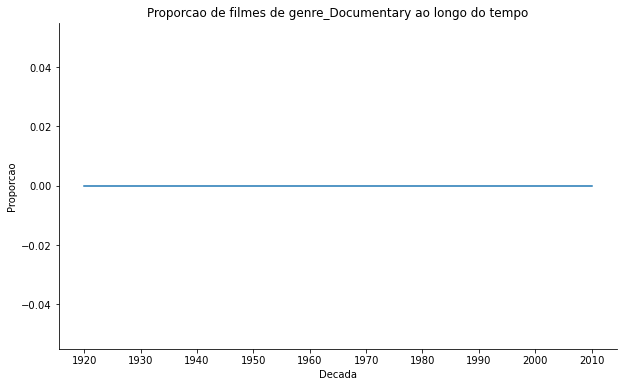

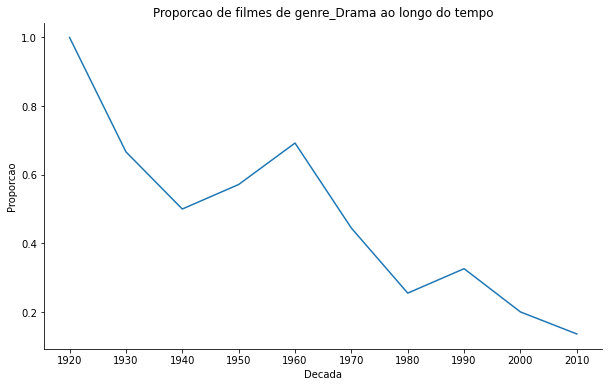

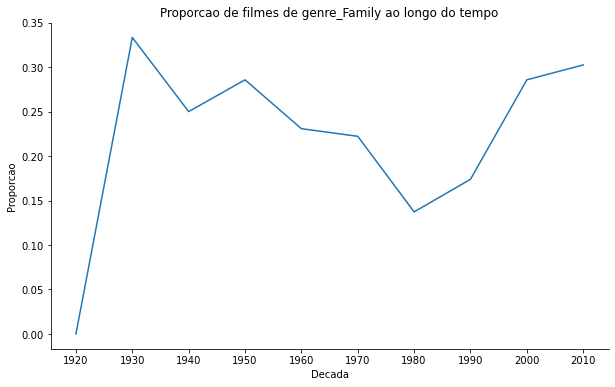

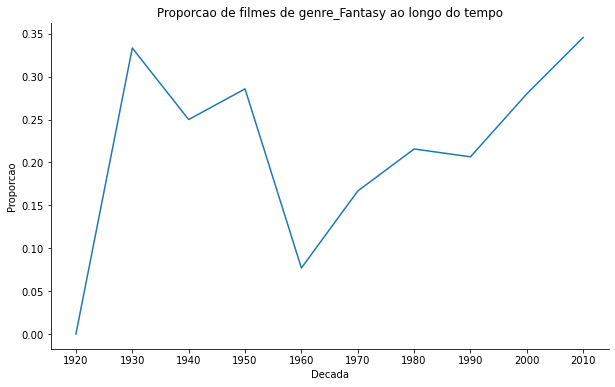

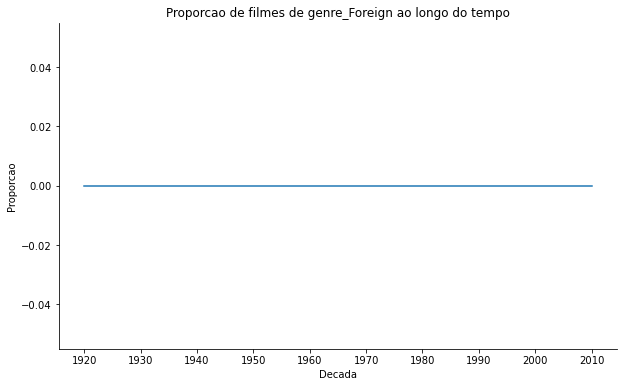

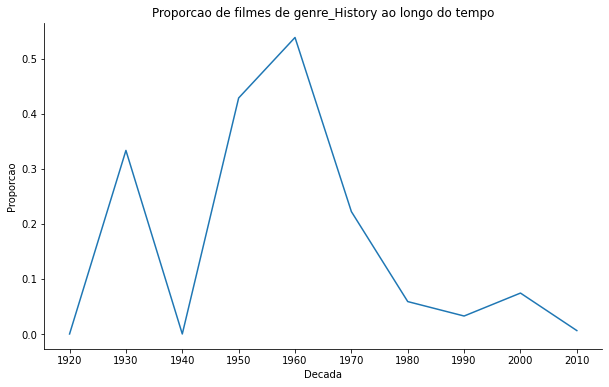

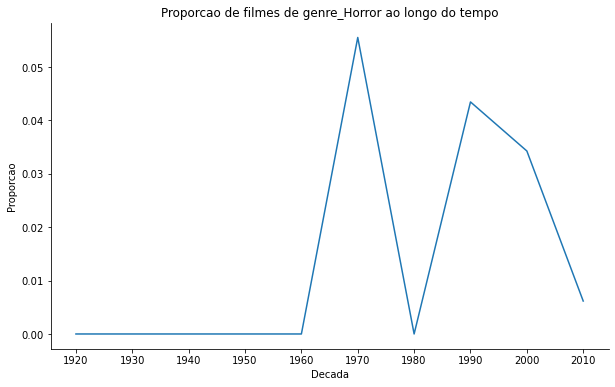

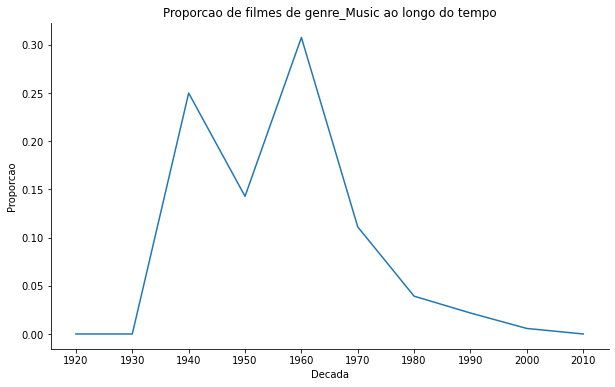

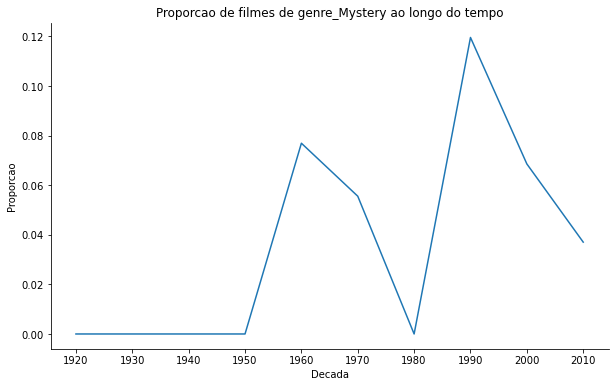

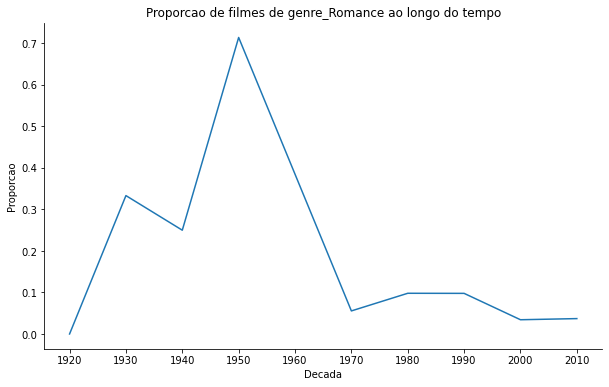

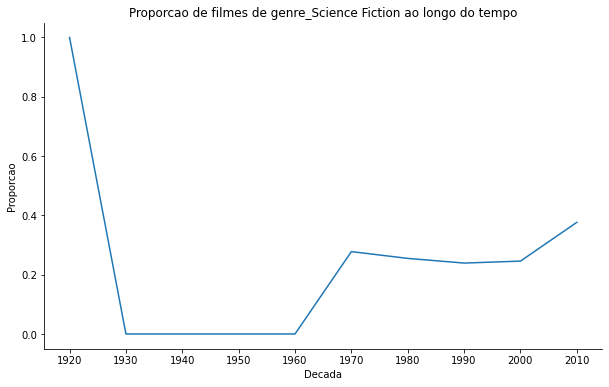

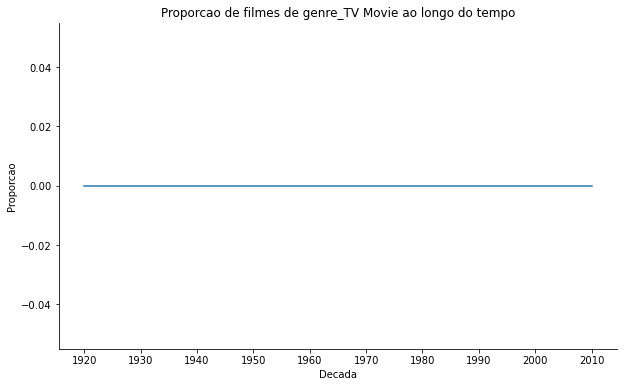

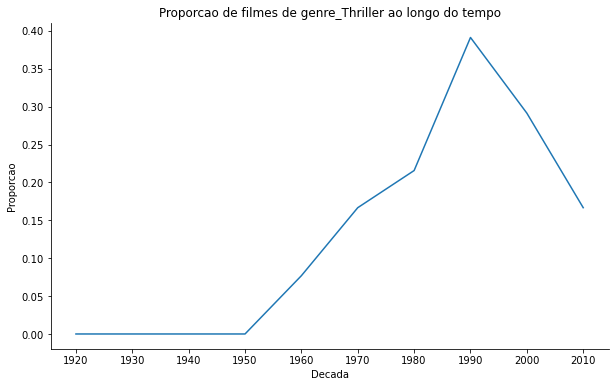

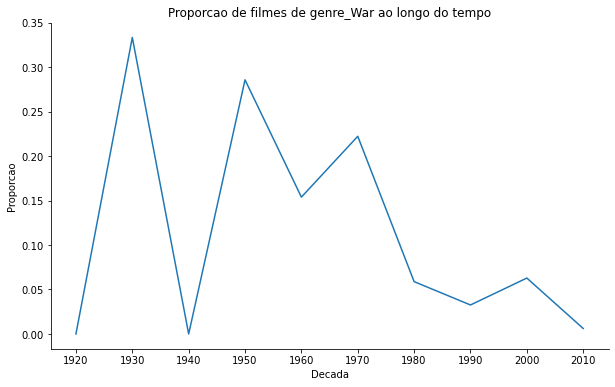

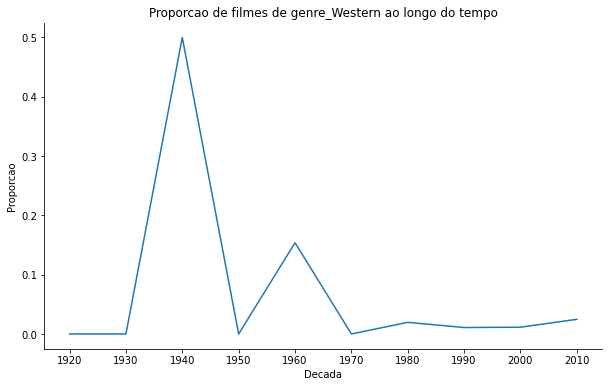

In [6]:
for genre in movies_select.filter(regex='genre_').columns:
    if genre == 'genre_names': continue # Ignora essa coluna

    movies_select['proportion'] = movies_select.groupby('decade')[genre].transform(lambda x: x.sum() / len(x)) # Calcula a proporção de filmes do gênero em cada década
    plt.figure(figsize=(10, 6))
    plt.plot(movies_select['decade'], movies_select['proportion'])
    plt.title(f'Proporcao de filmes de {genre} ao longo do tempo')
    plt.xlabel('Decada')
    plt.xticks(movies_select['decade'].unique())
    plt.ylabel('Proporcao')
    despine()
    plt.show()

### Os gráficos plotados anteriormente nos ajudam a visualizar a distribuição dos orçamentos por gênero e décadas, mas podemos usar a ciência de dados e a estatística mais ao nosso favor.
### Vamos construir intervalos de confiança e analisar probabilidades para aceitar ou rejeitar a seguinte hipótese:
### A diferença entre a média de orçamento do gênero com mais filmes no top 10% maiores orçamentos e a média de orçamento dos filmes de outros gêneros se dá pelo acaso.

Decada: 1930 - Genero: Drama - Numero de filmes: 2
T_obs: 1198000.0
LI: -611500.0 - LS: 611500.0
FORA do intervalo de confiança.
p-value: 0.0
Rejeitado.


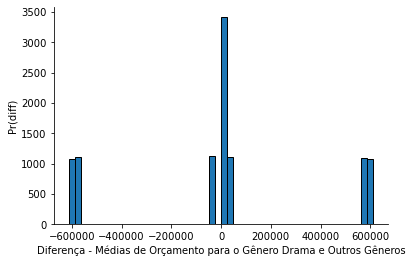

Decada: 1940 - Genero: Western - Numero de filmes: 2
T_obs: 1460000.0
LI: -2250000.0 - LS: 2300000.0
DENTRO do intervalo de confiança.
p-value: 0.1314
Aceito.


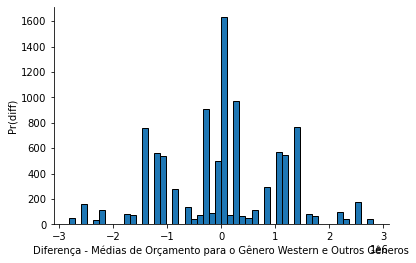

Decada: 1950 - Genero: Romance - Numero de filmes: 5
T_obs: -7550000.0
LI: -2800000.0 - LS: 2800000.0
FORA do intervalo de confiança.
p-value: 0.0
Rejeitado.


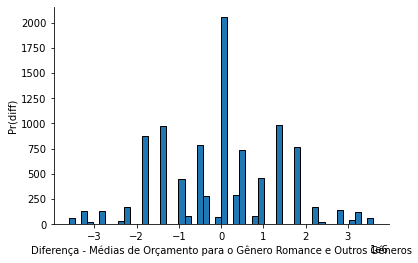

Decada: 1960 - Genero: Drama - Numero de filmes: 9
T_obs: -15015000.0
LI: -9803333.333333332 - LS: 9346111.111111112
FORA do intervalo de confiança.
p-value: 0.0071
Rejeitado.


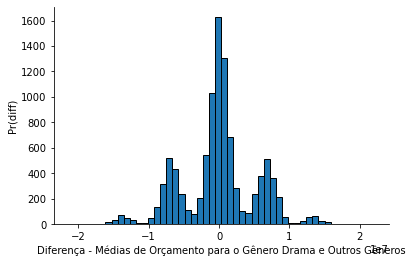

Decada: 1970 - Genero: Adventure - Numero de filmes: 9
T_obs: 3831666.666666668
LI: -8666666.666666668 - LS: 8496708.33333333
DENTRO do intervalo de confiança.
p-value: 0.3717
Aceito.


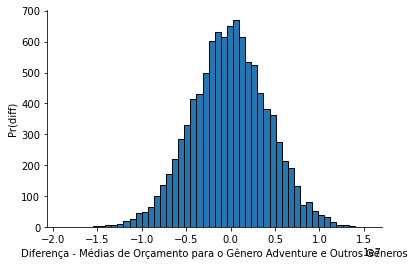

Decada: 1980 - Genero: Adventure - Numero de filmes: 25
T_obs: 4411507.692307696
LI: -5866320.0 - LS: 5755719.999999993
DENTRO do intervalo de confiança.
p-value: 0.1383
Aceito.


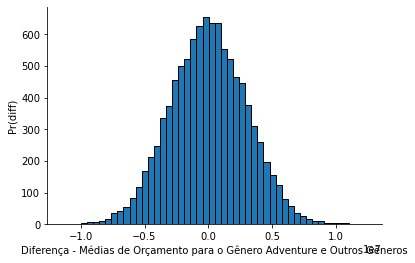

Decada: 1990 - Genero: Action - Numero de filmes: 51
T_obs: 8514586.322333813
LI: -9588725.490196075 - LS: 9373039.21568628
DENTRO do intervalo de confiança.
p-value: 0.0764
Aceito.


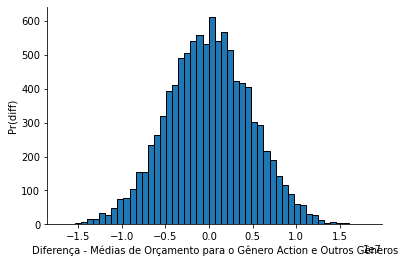

Decada: 2000 - Genero: Adventure - Numero de filmes: 100
T_obs: 22322504.0
LI: -9460250.0 - LS: 9430000.0
FORA do intervalo de confiança.
p-value: 0.0001
Rejeitado.


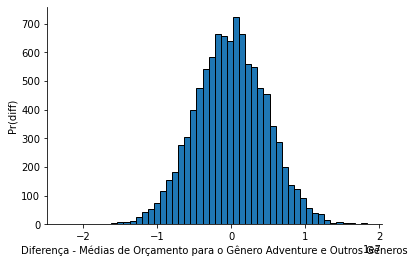

Decada: 2010 - Genero: Adventure - Numero de filmes: 119
T_obs: 13827297.673832327
LI: -6571428.571428567 - LS: 6647058.823529422
FORA do intervalo de confiança.
p-value: 0.0
Rejeitado.


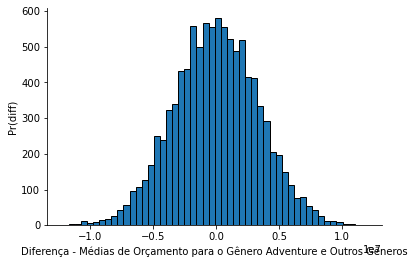

In [7]:
np.random.seed(0)

alpha = 0.05

num_samples = 10000

for decade in range(1920, 2011, 10):
    if(decade == 1920): continue
    medias = []
    genre_counts = movies_select[movies_select['decade'] == decade]['genre_names'].explode().value_counts()

    gen1_budgets = movies_select.query(f'decade == {decade} & `genre_{genre_counts.index[0]}` == 1')['budget'] # Orçamentos do gênero mais frequente
    outros_budgets = movies_select.query(f'decade == {decade} & `genre_{genre_counts.index[0]}` == 0')['budget'] 
    
    t_obs = gen1_budgets.mean() - outros_budgets.mean() # Diferença entre as médias de orçamento do gênero mais frequente e dos outros gêneros
    
    todos_budgets = np.concatenate((gen1_budgets, outros_budgets))
    
    # Bootstrap para calcular o intervalo de confiança
    for _ in range(num_samples):
        b_sample = np.random.choice(todos_budgets, size=len(todos_budgets), replace=True)
        b_media = b_sample[:len(gen1_budgets)].mean() - b_sample[len(outros_budgets):].mean()
        medias.append(b_media)
    
    li = np.percentile(medias, (alpha / 2) * 100)
    ls = np.percentile(medias, (1 - alpha / 2) * 100)

    print(f"Decada: {decade} - Genero: {genre_counts.index[0]} - Numero de filmes: {genre_counts[0]}")
    print(f"T_obs: {t_obs}")
    print(f"LI: {li} - LS: {ls}")

    if t_obs < li or t_obs > ls:
        print("FORA do intervalo de confiança.")
    else:
        print("DENTRO do intervalo de confiança.")

    p_value = (np.abs(medias) >= np.abs(t_obs)).mean() # Calcula o p-value
    print(f"p-value: {p_value}")

    # Teste de hipótese: H0 = A diferencia entre as médias de orçamento do gênero mais frequente e dos outros gêneros se dá pelo acaso
    if(p_value < alpha):
        print(f"Rejeitado.")
    else:
        print(f"Aceito.")

    # Plota o histograma das médias
    plt.hist(medias, bins=50, edgecolor='k')
    plt.xlabel('Diferença - Médias de Orçamento para o Gênero ' + genre_counts.index[0] + ' e Outros Gêneros')
    plt.ylabel('Pr(diff)')
    despine()
    plt.show()

## Regressão
### Conseguimos entender melhor a distribuição dos orçamentos por gênero e tempo e o quão significativa ela é. Será que é possível apontar fatores que expliquem as diferenças observadas?
### Responder essa pergunta com os dados que temos é... difícil. Fatores comportamentais e de época são difíceis de mensurar em dados e não estão presentes nos que temos. No entanto, talvez o lucro, que, usualmente, é um indicativo da recepção do filme pelo público, possa ser previsto e ter sua variância explicada pelos gêneros!

In [8]:
# Analisamos a relação entre o orçamento e o lucro dos filmes com os gêneros, para cada década. Para isso, utilizamos regressão linear múltipla, com os gêneros como variáveis categóricas.
# Para cada década, calculamos o R2 e o MSE do modelo, tanto para o orçamento quanto para o lucro. Também calculamos o R2 e o MSE para o modelo que considera a década como variável categórica.
for decade in range(1940, 2011, 10):
    print(decade)
    new_model = smf.ols(formula = "budget ~ C(genre_Action) + C(genre_Adventure) + C(genre_Animation) + C(genre_Comedy) + C(genre_Crime) + C(genre_Documentary) + C(genre_Drama) + C(genre_Family) + C(genre_Fantasy) + C(genre_History) + C(genre_Horror) + C(genre_Music) + C(genre_Mystery) + C(genre_Romance) + C(Q('genre_Science Fiction')) + C(Q('genre_TV Movie')) + C(genre_Thriller) + C(genre_War) + C(genre_Western)", data=movies_select.query(f'decade == {decade}'))
    results = new_model.fit()
    print("Budget | Década: " + str(decade) + " - R2: " + str(results.rsquared) + " - MSE: " + str(results.mse_model))

    new_model = smf.ols(formula = "profit ~ C(genre_Action) + C(genre_Adventure) + C(genre_Animation) + C(genre_Comedy) + C(genre_Crime) + C(genre_Documentary) + C(genre_Drama) + C(genre_Family) + C(genre_Fantasy) + C(genre_History) + C(genre_Horror) + C(genre_Music) + C(genre_Mystery) + C(genre_Romance) + C(Q('genre_Science Fiction')) + C(Q('genre_TV Movie')) + C(genre_Thriller) + C(genre_War) + C(genre_Western)", data=movies_select.query(f'decade == {decade}'))
    results = new_model.fit()
    print("Profit | Década: " + str(decade) + " - R2: " + str(results.rsquared) + " - MSE: " + str(results.mse_model))
    

print("")

# Agora, consideramos a década como variável categórica. Não analisaremos mais a relação entre orçamento/lucro e os gêneros em cada década separadamente, mas sim a relação entre orçamento/lucro e os gêneros em geral, considerando a década em que o filme foi lançado.

new_model = smf.ols(formula = "budget ~ C(genre_Action) + C(genre_Adventure) + C(genre_Animation) + C(genre_Comedy) + C(genre_Crime) + C(genre_Documentary) + C(genre_Drama) + C(genre_Family) + C(genre_Fantasy) + C(genre_History) + C(genre_Horror) + C(genre_Music) + C(genre_Mystery) + C(genre_Romance) + C(Q('genre_Science Fiction')) + C(Q('genre_TV Movie')) + C(genre_Thriller) + C(genre_War) + C(genre_Western) + decade", data=movies_select)
results = new_model.fit()
print(results.summary())

new_model = smf.ols(formula = "profit ~ C(genre_Action) + C(genre_Adventure) + C(genre_Animation) + C(genre_Comedy) + C(genre_Crime) + C(genre_Documentary) + C(genre_Drama) + C(genre_Family) + C(genre_Fantasy) + C(genre_History) + C(genre_Horror) + C(genre_Music) + C(genre_Mystery) + C(genre_Romance) + C(Q('genre_Science Fiction')) + C(Q('genre_TV Movie')) + C(genre_Thriller) + C(genre_War) + C(genre_Western) + decade", data=movies_select)
results = new_model.fit()
print(results.summary())


1940
Budget | Década: 1940 - R2: 1.0 - MSE: 1562266666666.6667
Profit | Década: 1940 - R2: 1.0 - MSE: 47861974319844.0
1950
Budget | Década: 1950 - R2: 1.0 - MSE: 14580357142857.143
Profit | Década: 1950 - R2: 1.0 - MSE: 2234758214285714.2
1960
Budget | Década: 1960 - R2: 0.9993827752995673 - MSE: 331190900000000.0
Profit | Década: 1960 - R2: 0.824750441937407 - MSE: 524673736290811.56
1970
Budget | Década: 1970 - R2: 0.8257513430845409 - MSE: 82195774431216.92
Profit | Década: 1970 - R2: 0.9497710469127861 - MSE: 9512574338877142.0
1980
Budget | Década: 1980 - R2: 0.3972490085525796 - MSE: 151000918597508.94
Profit | Década: 1980 - R2: 0.285518256761761 - MSE: 1.7322786169114956e+16
1990
Budget | Década: 1990 - R2: 0.2593501878872958 - MSE: 1000259947404525.6
Profit | Década: 1990 - R2: 0.13155171145650457 - MSE: 3.570053093644631e+16
2000
Budget | Década: 2000 - R2: 0.1684133784654983 - MSE: 2601896364014292.5
Profit | Década: 2000 - R2: 0.20426959822224688 - MSE: 1.9314650578286723e

#### Podemos ver que, ao longo do tempo, os gêneros, sozinhos, foram ficando menos expressivos na explicação da variância de orçamento e lucro. Acredito que isso seja esperado, visto que cada vez mais filmes são produzidos e mais motivos para se fazer um determinado filme de um determinado jeito surgem.

## Conclusão
#### Como colocado anteriormente, a pergunta que escolhi tentar responder não envolve tantas previsões, mas sim uma análise de como os dados se distribuem levando em conta as variáveis colocadas. A partir disso, podemos perceber que, de fato, a distribuição dos orçamentos por gênero muda bastante ao longo do tempo.
#### É interessante pensar que, ao se buscar informações acerca do contexto histórico em que cada gênero tinha mais investimentos, podemos descobrir diversas coisas. O gênero musical, por exemplo, teve uma quantidade considerável de filmes com alto investimentos nos anos que sucederam a Grande Depressão dos Estados Unidos - a fim de combater o sentimento ruim que prevalecia no país, os cineastas quiseram produzir filmes mais positivos e que animassem o público.
#### Com isso, conseguimos ver que tal distribuição não se dá atoa. Apesar da falta de material para descobrir as razões mais profundas das diferenças previamente citadas, podemos, ao menos, saber que elas existem.